***IMPORT LIBRARIES AND DATA***




In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/energy_consumption_model.csv')

***EXPLORE DATA PRIOR TO CLEANING***

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   object 
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          999 non-null    float64
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), object(6)
memory usage: 86.1+ KB
None


In [ ]:
print('HVACUSage Unique:',df.HVACUsage.unique())
print('LightingUsage Unique:',df.LightingUsage.unique())
print('DayOfWeek Unique:',df.DayOfWeek.unique())
print('Holiday Unique:',df.Holiday.unique())

HVACUSage Unique: ['On' 'Off' 'One']
LightingUsage Unique: ['Off' 'On' 'Of']
DayOfWeek Unique: ['Monday' 'Saturday' 'Sunday' 'Wednesday' 'Friday' 'Thursday' 'Tuesday'
 'Wed' 'Sun']
Holiday Unique: ['No' 'Yes' 'Not']


***NOTES ON DATA THUS FAR***

*   Temperature is showing as object not integer
*   Occupancy is missing a value
*   HVACUsage has a spelling error
*   LightingUsage has a spelling error
*   DayOfWeek has inconsistent data
*   Holiday has spelling error


***CORRECTIONS BELOW***  
## ---

In [ ]:
### Sometimes it's faster to see what is causing the error than search deliberately for it.
print(df.Temperature.describe())
df.Temperature.astype(float)

count            1000
unique           1000
top       25.13943344
freq                1
Name: Temperature, dtype: object


ValueError: could not convert string to float: '25,391,999,374,256,400'

In [ ]:
# Using error, I replaced, tested and confirmed adjustment.

df.Temperature=df.Temperature.replace('25,391,999,374,256,400','25.391999374256400')
df.Temperature=df.Temperature.astype(float)
print(df.Temperature.describe())

count    1000.000000
mean       24.982026
std         2.836850
min        20.007565
25%        22.645070
50%        24.751637
75%        27.418174
max        29.998671
Name: Temperature, dtype: float64


In [ ]:
# Corrections and Confirmations
df['HVACUsage']=df['HVACUsage'].replace('One','On')
df['LightingUsage']=df['LightingUsage'].replace('Of','Off')
df['DayOfWeek']=df['DayOfWeek'].replace('Wed','Wednesday').replace('Sun','Sunday')
df['Holiday']=df['Holiday'].replace('Not','No')
print('HVACUSage Unique:',df.HVACUsage.unique())
print('LightingUsage Unique:',df.LightingUsage.unique())
print('DayOfWeek Unique:',df.DayOfWeek.unique())
print('Holiday Unique:',df.Holiday.unique())

HVACUSage Unique: ['On' 'Off']
LightingUsage Unique: ['Off' 'On']
DayOfWeek Unique: ['Monday' 'Saturday' 'Sunday' 'Wednesday' 'Friday' 'Thursday' 'Tuesday']
Holiday Unique: ['No' 'Yes']


***REVIEW INTEGER COLUMNS FOR INCONSISTENCIES***

In [ ]:
print(df.describe())

       Temperature     Humidity  SquareFootage   Occupancy  RenewableEnergy  \
count  1000.000000  1000.000000    1000.000000  999.000000      1000.000000   
mean     24.982026    50.205160    1498.203992    4.582583        15.132813   
std       2.836850   152.436681     291.965415    2.866596         8.745917   
min      20.007565    30.015974      18.671677    0.000000         0.006642   
25%      22.645070    38.297722    1244.533627    2.000000         7.628385   
50%      24.751637    45.972116    1507.767771    5.000000        15.072296   
75%      27.418174    52.438133    1740.088767    7.000000        22.884064   
max      29.998671  4858.331043    1999.982252    9.000000        29.965327   

       EnergyConsumption  
count        1000.000000  
mean           77.055873  
std             8.144112  
min            53.263278  
25%            71.544690  
50%            76.943696  
75%            82.921742  
max            99.201120  


***NOTES ON INTEGERS***

*   Humidity has a standard deviation of 152+ but up to 75% there is less than 10 digit difference.
*   SquareFootage has a mean of appx. 1500 but minimum of 18

***Made corrections below***





In [ ]:
print(df.Humidity.sort_values(ascending=False))
print('\n\nPrint Max Full Number:',df.Humidity.max())
df['Humidity']=df['Humidity'].replace(4858.331043267368,48.58331043267368)
print('\n\n',df.Humidity.describe())


66     4858.331043
448      59.969085
741      59.954514
720      59.950060
873      59.938708
          ...     
678      30.161940
640      30.153231
598      30.135706
597      30.032665
630      30.015974
Name: Humidity, Length: 1000, dtype: float64


Print Max Full Number: 4858.331043


 count    1000.000000
mean       50.205160
std       152.436681
min        30.015974
25%        38.297722
50%        45.972116
75%        52.438133
max      4858.331043
Name: Humidity, dtype: float64


In [ ]:
print(df.SquareFootage.sort_values(ascending=False))
print('\n\nPrint Minimum Square Footage full number:',df.SquareFootage.min())
df['SquareFootage']=df['SquareFootage'].replace(18.67167664056919,1867.167664056919)
print('\n\n',df.SquareFootage.describe())

959    1999.982252
770    1999.750981
168    1999.204208
793    1998.439525
463    1995.022126
          ...     
167    1004.406550
962    1004.110672
509    1003.941513
467    1000.512661
283      18.671677
Name: SquareFootage, Length: 1000, dtype: float64


Print Minimum Square Footage full number: 18.67167664


 count    1000.000000
mean     1498.203992
std       291.965415
min        18.671677
25%      1244.533627
50%      1507.767771
75%      1740.088767
max      1999.982252
Name: SquareFootage, dtype: float64


***PER MEETING AND REQUEST ADDING FOLLOWING***

*   Separate Date from Time
*   Match Day of Week to the Date


In [ ]:
#Separate Date and Time
df['Date']=pd.to_datetime(df['Timestamp']).dt.date
df['Time']=pd.to_datetime(df['Timestamp']).dt.time
print('Date Confirm:',df['Date'].head())
print('\n\nTime Confirm:',df['Time'].head())


Date Confirm: 0    2022-01-01
1    2022-01-01
2    2022-01-01
3    2022-01-01
4    2022-01-01
Name: Date, dtype: object


Time Confirm: 0    00:00:00
1    01:00:00
2    02:00:00
3    03:00:00
4    04:00:00
Name: Time, dtype: object


In [ ]:
#Day of Week Correction and Confirmation
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['CorrectDayofWeek']=df['Timestamp'].apply(lambda time: time.dayofweek)
df['CorrectDayofWeekDay']=df['CorrectDayofWeek'].replace(1,'Sunday')\
.replace(2,'Monday').replace(3,'Tuesday').replace(4,'Wednesday').replace(5,'Thursday')\
.replace(6,'Friday').replace(7,'Saturday')
print('\n\nCorrected Day of Week Confirm:',df['CorrectDayofWeek'].head())
print('\n\nCorrected Day of Weekday Confirm:',df['CorrectDayofWeekDay'].head())



Corrected Day of Week Confirm: 0    5
1    5
2    5
3    5
4    5
Name: CorrectDayofWeek, dtype: int64


Corrected Day of Weekday Confirm: 0    Thursday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: CorrectDayofWeekDay, dtype: object


In [ ]:
df['Temp_F']=(df['Temperature']*9/5)+32
df.rename(columns={'Temperature':'Temp_C'},inplace=True)

In [ ]:
# Pulling out AM/PM from Date/Time

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['AM/PM'] = df['Timestamp'].dt.strftime('%p')
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df

,AM/PM,Timestamp,Temp_C,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption,Date,Time,CorrectDayofWeek,CorrectDayofWeekDay,Temp_F
0,AM,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5.0,On,Off,2.774699,Monday,No,75.364373,2022-01-01,00:00:00,5,Thursday,77.250980
1,AM,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1.0,On,On,21.831384,Saturday,No,83.401855,2022-01-01,01:00:00,5,Thursday,81.916971
2,AM,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2.0,Off,Off,6.764672,Sunday,No,78.270888,2022-01-01,02:00:00,5,Thursday,83.667698
3,AM,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1.0,Off,On,8.623447,Wednesday,No,56.519850,2022-01-01,03:00:00,5,Thursday,68.144845
4,AM,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9.0,On,Off,3.071969,Friday,No,70.811732,2022-01-01,04:00:00,5,Thursday,73.575247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,AM,2022-02-11 11:00:00,28.619382,48.850160,1080.087000,5.0,Off,Off,21.194696,Saturday,No,82.306692,2022-02-11,11:00:00,4,Wednesday,83.514888
996,PM,2022-02-11 12:00:00,23.836647,47.256436,1705.235156,4.0,Off,On,25.748176,Tuesday,Yes,66.577320,2022-02-11,12:00:00,4,Wednesday,74.905964
997,PM,2022-02-11 13:00:00,23.005340,48.720501,1320.285281,6.0,Off,On,0.297079,Friday,Yes,72.753471,2022-02-11,13:00:00,4,Wednesday,73.409612
998,PM,2022-02-11 14:00:00,25.138365,31.306459,1309.079719,3.0,On,Off,20.425163,Thursday,Yes,76.950389,2022-02-11,14:00:00,4,Wednesday,77.249057


***FIX MISSING DATA WITH MEAN VALUE***

In [ ]:
print(df.Occupancy.mean())

4.5825825825825826


In [ ]:
df['Occupancy']=df['Occupancy'].fillna(5)
df.Occupancy.describe()

count    1000.000000
mean        4.583000
std         2.865191
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Occupancy, dtype: float64

In [ ]:
clean_df=df[['DayOfWeek','CorrectDayofWeek','CorrectDayofWeekDay','AM/PM', 'Temp_C','Temp_F','Humidity','SquareFootage','Occupancy','HVACUsage','LightingUsage','RenewableEnergy','Holiday','EnergyConsumption']]

## ***FINAL CLEAN DATASET RENAMED TO clean_df***

In [ ]:
print('Clean Data:\n\n',clean_df)

Clean Data:

      DayOfWeek  CorrectDayofWeek CorrectDayofWeekDay AM/PM     Temp_C  \
0       Monday                 5            Thursday    AM  25.139433   
1     Saturday                 5            Thursday    AM  27.731651   
2       Sunday                 5            Thursday    AM  28.704277   
3    Wednesday                 5            Thursday    AM  20.080469   
4       Friday                 5            Thursday    AM  23.097359   
..         ...               ...                 ...   ...        ...   
995   Saturday                 4           Wednesday    AM  28.619382   
996    Tuesday                 4           Wednesday    PM  23.836647   
997     Friday                 4           Wednesday    PM  23.005340   
998   Thursday                 4           Wednesday    PM  25.138365   
999   Saturday                 4           Wednesday    PM  23.051165   

        Temp_F   Humidity  SquareFootage  Occupancy HVACUsage LightingUsage  \
0    77.250980  43.431581    1

# **Beginning of EDA**

### Renaming clean_df to model_df and dropping the Temp_C column due to the temperature column being converted from Celsius to Fahrenheit and placed in a new Temp_F column. The CorrectDayofWeekDay column is being dropped as those days were converted to numbers to be used later on in the model

In [ ]:
# Importing libraries

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

model_df = clean_df.drop(['Temp_C', 'CorrectDayofWeekDay'], axis=1)

## Histogram of Numerical Data

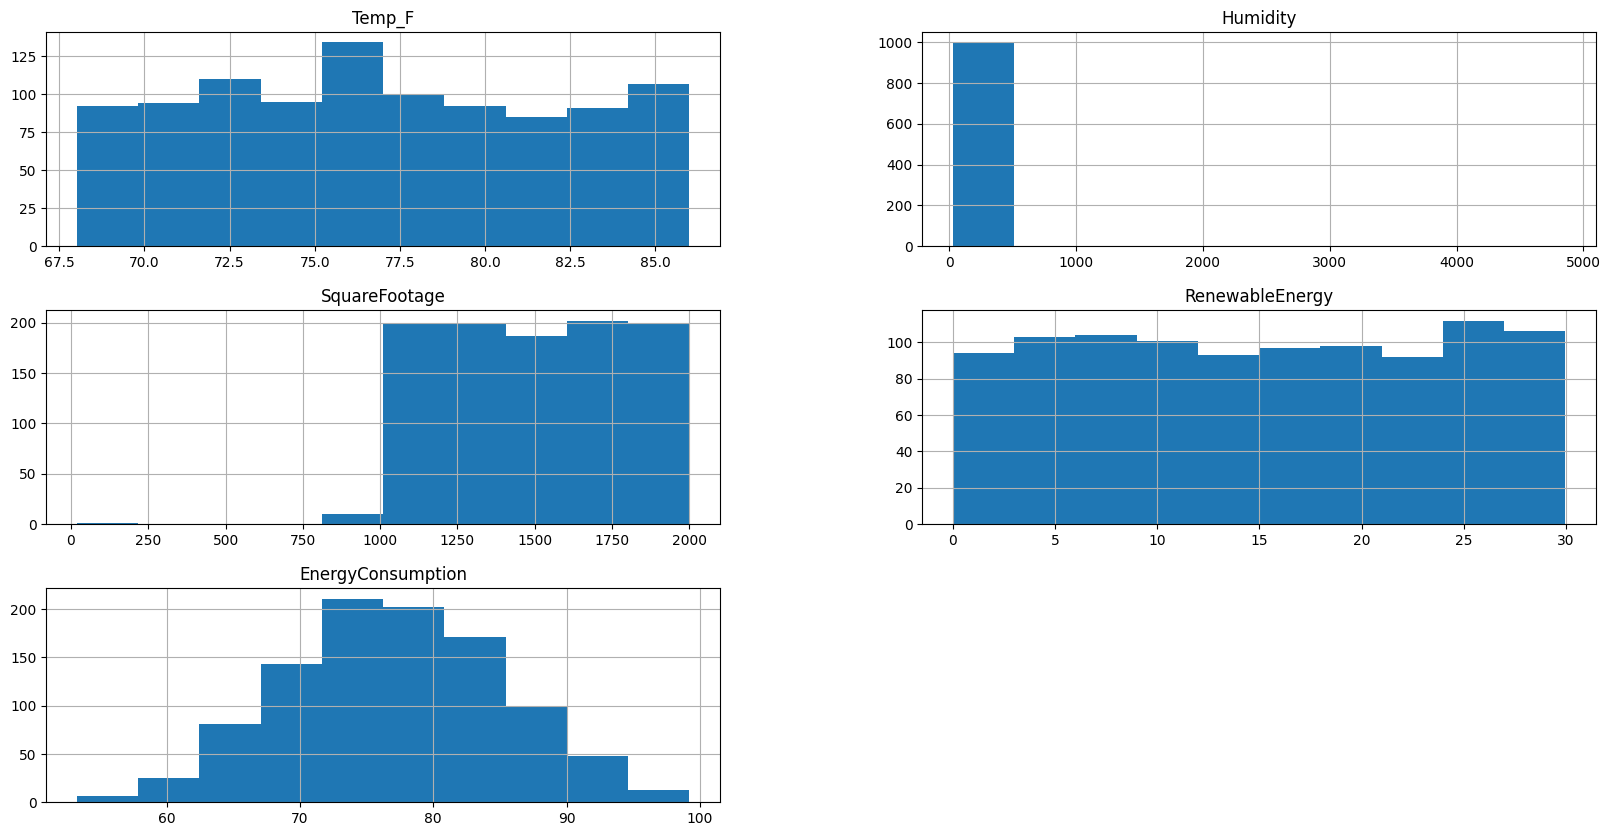

In [ ]:
model_df[['Temp_F', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']].hist(bins=10, figsize=(20, 10));

## Bar Plots of Categorical Data

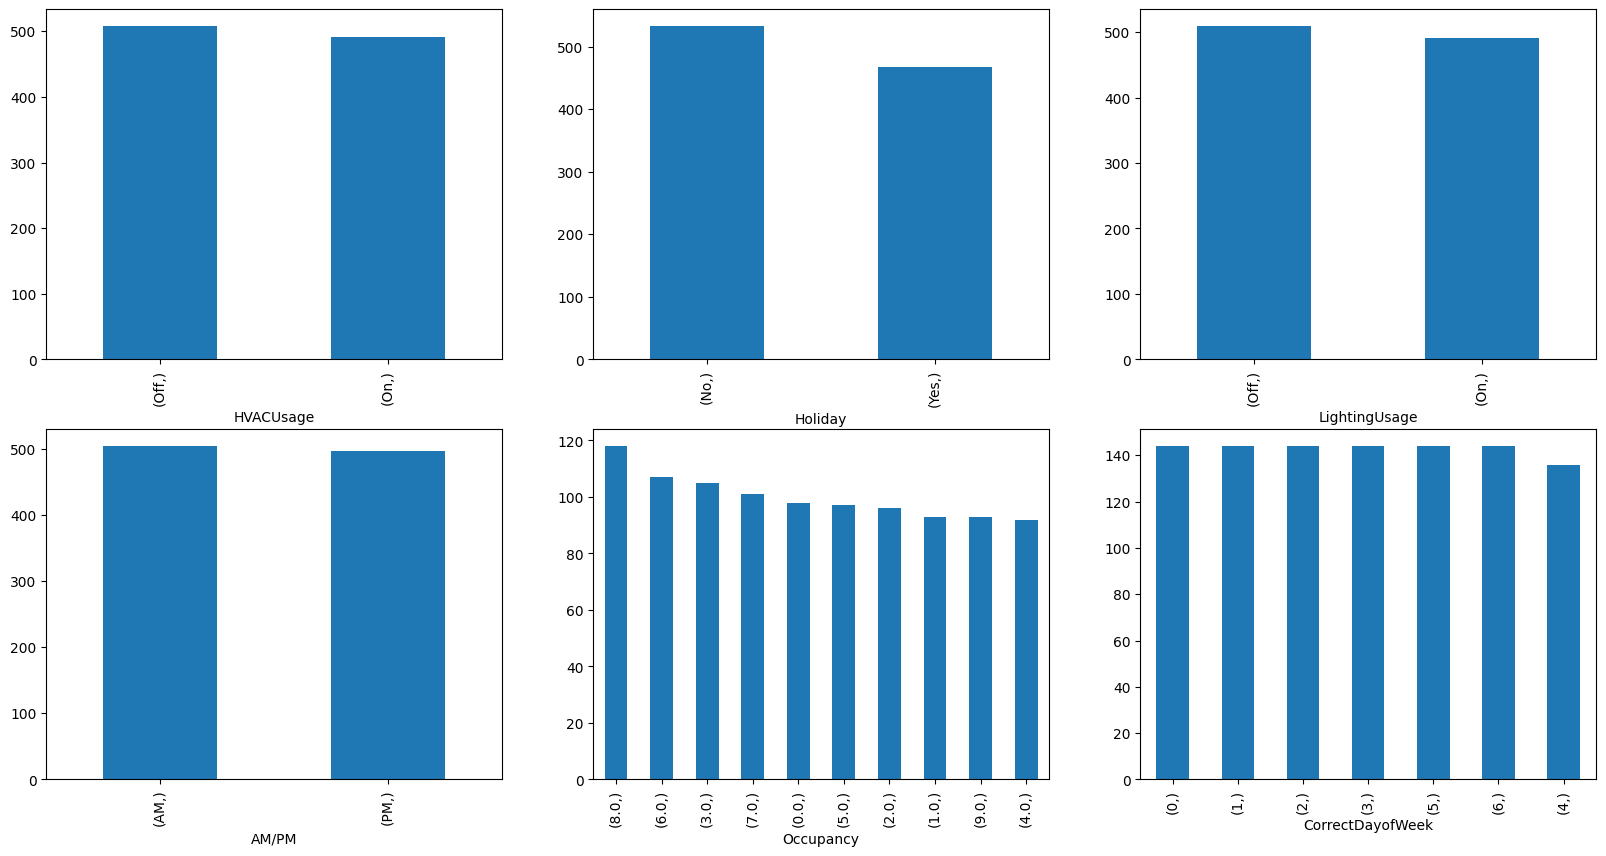

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

axe = axes.ravel()
model_df[['HVACUsage']].value_counts().plot(ax=axe[0], kind='bar')
model_df[['Holiday']].value_counts().plot(ax=axe[1], kind='bar')
model_df[['LightingUsage']].value_counts().plot(ax=axe[2], kind='bar')
model_df[['AM/PM']].value_counts().plot(ax=axe[3], kind='bar')
model_df[['Occupancy']].value_counts().plot(ax=axe[4], kind='bar')
model_df[['CorrectDayofWeek']].value_counts().plot(ax=axe[5], kind='bar');

In [ ]:
# Encoding each column that has "Yes/No" or "On/Off"

model_df['Holiday'] = model_df['Holiday'].apply(
    lambda x: 1 if x == 'Yes' else (0 if x == 'No' else None))

model_df['HVACUsage'] = model_df['HVACUsage'].apply(
    lambda x: 1 if x == 'On' else (0 if x == 'Off' else None))

model_df['LightingUsage'] = model_df['LightingUsage'].apply(
    lambda x: 1 if x == 'On' else (0 if x == 'Off' else None))

model_df['AM/PM'] = model_df['AM/PM'].apply(
    lambda x: 1 if x == 'PM' else (0 if x == 'AM' else None))

In [ ]:
# Assessing the correlation of the features and EnergyConsumption

model_df[['AM/PM', 'Temp_F', 'HVACUsage', 'Holiday', 'LightingUsage', 'CorrectDayofWeek', 'Occupancy', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']].corr()

,AM/PM,Temp_F,HVACUsage,Holiday,LightingUsage,CorrectDayofWeek,Occupancy,Humidity,SquareFootage,RenewableEnergy,EnergyConsumption
AM/PM,1.000000,0.048249,-0.040134,0.081653,0.033863,-0.004020,0.051565,0.033064,-0.003005,0.018159,0.009497
Temp_F,0.048249,1.000000,0.001237,0.026893,0.009446,0.028313,-0.002292,-0.007249,0.007184,-0.001350,0.696410
HVACUsage,-0.040134,0.001237,1.000000,0.033020,-0.050303,0.069737,0.011989,-0.036321,0.024256,0.016219,0.286464
Holiday,0.081653,0.026893,0.033020,1.000000,0.042913,-0.010256,0.029214,0.031840,-0.021682,-0.035892,0.056676
LightingUsage,0.033863,0.009446,-0.050303,0.042913,1.000000,0.055770,-0.012750,-0.032246,-0.010488,-0.029295,0.093423
CorrectDayofWeek,-0.004020,0.028313,0.069737,-0.010256,0.055770,1.000000,-0.036266,-0.048694,-0.035640,0.056701,0.060690
Occupancy,0.051565,-0.002292,0.011989,0.029214,-0.012750,-0.036266,1.000000,0.049010,0.016908,0.014086,0.187646
Humidity,0.033064,-0.007249,-0.036321,0.031840,-0.032246,-0.048694,0.049010,1.000000,0.013318,0.034651,-0.070816
SquareFootage,-0.003005,0.007184,0.024256,-0.021682,-0.010488,-0.035640,0.016908,0.013318,1.000000,0.028145,-0.000044
RenewableEnergy,0.018159,-0.001350,0.016219,-0.035892,-0.029295,0.056701,0.014086,0.034651,0.028145,1.000000,0.081160


It would appear Temp_F has the highest correlation with EnergyConsumption at 0.6964, HVACUsage is next with 0.2865, and then Occupancy at 0.1876.



## Checking for Outliers




In [ ]:
# Creating a separate df to use to check for outliers

outlier_df = model_df[['Temp_F', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']]

<ipython-input-28-8d9d48501849>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Temp_F', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption'])


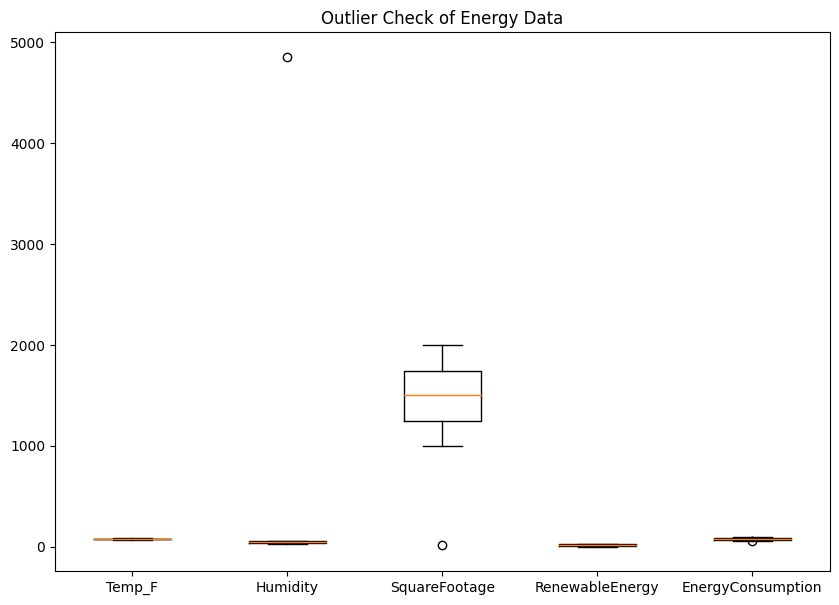

In [ ]:
# Creating a box plot with the outlier_df data to check for outliers

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

ax.set_xticklabels(['Temp_F', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption'])
ax.set_title('Outlier Check of Energy Data')
plt.boxplot(outlier_df);

## It appears that there is an outlier with regards to the EnergyConsumption field.

In [ ]:
# finding the 1st quartile
q1 = np.quantile(outlier_df['EnergyConsumption'], 0.25)

# finding the 3rd quartile
q3 = np.quantile(outlier_df['EnergyConsumption'], 0.75)
med = np.median(outlier_df['EnergyConsumption'])

# finding the iqr region
iqr = q3-q1

# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

11.377051712499991 99.98731963374998 54.47911278375001


In [ ]:
# Checking the outlier in the EnergyConsumption field

outliers = outlier_df['EnergyConsumption'][(outlier_df['EnergyConsumption'] <= lower_bound) | (outlier_df['EnergyConsumption'] >= upper_bound)]
outliers

69    53.263278
Name: EnergyConsumption, dtype: float64

# Scaling the Data

In [ ]:
# Creating an instance for the MinMaxScaler and applying the scaler to the features being used as input for the model and the target (EnergyConsumption)

scaler = preprocessing.MinMaxScaler()

model_df[['Temp_F', 'Occupancy', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']] = (
scaler.fit_transform(model_df[['Temp_F', 'Occupancy', 'Humidity', 'SquareFootage', 'RenewableEnergy', 'EnergyConsumption']]))

## Preparing Data for Initial Model

### Despite Temp_F, HVACUsage and Occupancy being the 3 features with the highest correlation coefficients, we are going to test the initial model with additional features to assess how it performs.

In [ ]:
X = model_df[['Temp_F', 'Humidity', 'HVACUsage', 'Occupancy', 'SquareFootage', 'RenewableEnergy', 'Holiday', 'LightingUsage',
              'AM/PM', 'CorrectDayofWeek']]
y = model_df[['EnergyConsumption']]

# Using a training/test set in a 80/20 ratio for initial run

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Regressor Model

In [ ]:
# Creating an instance for the RandomForestRegressor model, along with training it and testing it

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-33-8df2aae30d67>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


### Evaluation metrics of the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0143
Root Mean Squared Error (RMSE): 0.1197
Mean Absolute Error (MAE): 0.0947
Train R-squared: 0.9380
Test R-squared: 0.5387


## Adjusting Training/Test set ratio from 80/20 to 90/10

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-36-01c7ca1c333f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0127
Root Mean Squared Error (RMSE): 0.1129
Mean Absolute Error (MAE): 0.0921
Train R-squared: 0.9378
Test R-squared: 0.5823


## Hypertuning Random Forest model

In [ ]:
# Setting up grid parameters

param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_features': [2, 4, 6, 8],
    'max_depth': [1, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Conducting a grid search for the best parameters for the Random Forest model based on features

rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)

rf_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150, 200, 250]})

### Best Parameters suggested by GridSearch along with a Ranking of Feature Importance

In [ ]:
best_params = rf_grid_search.best_params_
best_feat = rf_grid_search.best_estimator_
feat_importance = best_feat.feature_importances_
print(f"Best hyperparameters: {best_params}")
print()

# This is creating a dataframe that has all of the feature columns and their ranking of importance

feat_imp_col_names = X.columns

feature_imp_df = pd.DataFrame(feat_importance, index=feat_imp_col_names, columns=["Importance"])
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)
feature_imp_df

Best hyperparameters: {'max_depth': 15, 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 150}



,Importance
Temp_F,0.547631
RenewableEnergy,0.084549
HVACUsage,0.078840
Humidity,0.074200
Occupancy,0.073094
SquareFootage,0.068118
CorrectDayofWeek,0.034604
LightingUsage,0.015649
Holiday,0.012039
AM/PM,0.011275


###Running model again with updated parameters based on GridSearch

In [ ]:
rf_regressor = RandomForestRegressor(max_depth = 15, max_features = 4, n_estimators = 100, min_samples_leaf = 2, random_state = 0)
rf_regressor.fit(X_train, y_train)

rf_y_train_pred = rf_regressor.predict(X_train)
rf_y_pred = rf_regressor.predict(X_test)

<ipython-input-41-ba3a76f373be>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


### Evaluation metrics of the model

In [ ]:
mse = mean_squared_error(y_test, rf_y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, rf_y_pred)
test_r2 = r2_score(y_train, rf_y_train_pred)
r2 = r2_score(y_test, rf_y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0123
Root Mean Squared Error (RMSE): 0.1108
Mean Absolute Error (MAE): 0.0918
Train R-squared: 0.8883
Test R-squared: 0.5978


### Adjusting the model be removing the lowest 2 features based on importance (AM/PM and Holiday)

In [ ]:
X = model_df[['Temp_F', 'HVACUsage', 'Humidity', 'Occupancy', 'RenewableEnergy', 'CorrectDayofWeek', 'LightingUsage']]
y = model_df[['EnergyConsumption']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Training the model on the updated features

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-44-801b0461c98e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


### Evaluation metrics of the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0123
Root Mean Squared Error (RMSE): 0.1110
Mean Absolute Error (MAE): 0.0891
Train R-squared: 0.9369
Test R-squared: 0.5962


## Rechecking for best parameters using GridSearch on the updated features

In [ ]:
rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [ ]:
best_params = rf_grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 4, 'n_estimators': 250}


### Re-running the model with the updated parameters

In [ ]:
rf_regressor = RandomForestRegressor(max_depth = 20, max_features = 2, n_estimators = 200, min_samples_leaf = 1, random_state = 0)

rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-48-fb3b8a8fdffa>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


### Evaluation metrics of the model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0123
Root Mean Squared Error (RMSE): 0.1111
Mean Absolute Error (MAE): 0.0925
Train R-squared: 0.9415
Test R-squared: 0.5954


## Running Random Forest model with top 3 features based on feature importance

In [ ]:
X = model_df[['Temp_F', 'HVACUsage', 'RenewableEnergy']]
y = model_df[['EnergyConsumption']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-51-801b0461c98e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0141
Root Mean Squared Error (RMSE): 0.1189
Mean Absolute Error (MAE): 0.0970
Train R-squared: 0.9263
Test R-squared: 0.5363


In [ ]:
rf_grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 5, 10, 15, 20],
                         'max_features': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [ ]:
# Rechecking for the best parameters

best_params = rf_grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
print()

Best hyperparameters: {'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 250}



## Re-running model after hypertuning model parameters

In [ ]:
rf_regressor = RandomForestRegressor(max_depth = 5, max_features = 2, min_samples_leaf = 1, n_estimators = 250, random_state = 0)

rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)

<ipython-input-55-a261a72ea272>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_train, y_train_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0134
Root Mean Squared Error (RMSE): 0.1157
Mean Absolute Error (MAE): 0.0949
Train R-squared: 0.6445
Test R-squared: 0.5613


## Testing out Linear Regression Model with all features to see how a different model performs on the data

In [ ]:
from sklearn.linear_model import LinearRegression

X = model_df[['Temp_F', 'Humidity', 'HVACUsage', 'Occupancy', 'SquareFootage', 'RenewableEnergy', 'Holiday', 'LightingUsage',
              'AM/PM', 'CorrectDayofWeek']]
y = model_df[['EnergyConsumption']]

# Starting out running model with a training/test ratio of 80/20

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_regressor = LinearRegression()

lr_regressor.fit(lr_X_train, lr_y_train)

lr_y_train_pred = lr_regressor.predict(lr_X_train)
lr_y_pred = lr_regressor.predict(lr_X_test)

In [ ]:
mse = mean_squared_error(lr_y_test, lr_y_pred)
rmse = mse**0.5
mae = mean_absolute_error(lr_y_test, lr_y_pred)
test_r2 = r2_score(lr_y_train, lr_y_train_pred)
r2 = r2_score(lr_y_test, lr_y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0679
Root Mean Squared Error (RMSE): 0.2605
Mean Absolute Error (MAE): 0.1040
Train R-squared: 0.6259
Test R-squared: -1.1863


## Running model again with a training/test ratio of 90/10

In [ ]:
lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
lr_regressor = LinearRegression()

lr_regressor.fit(lr_X_train, lr_y_train)

lr_y_train_pred = lr_regressor.predict(lr_X_train)
lr_y_pred = lr_regressor.predict(lr_X_test)

In [ ]:
mse = mean_squared_error(lr_y_test, lr_y_pred)
rmse = mse**0.5
mae = mean_absolute_error(lr_y_test, lr_y_pred)
test_r2 = r2_score(lr_y_train, lr_y_train_pred)
r2 = r2_score(lr_y_test, lr_y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.1867
Root Mean Squared Error (RMSE): 0.4321
Mean Absolute Error (MAE): 0.1268
Train R-squared: 0.6209
Test R-squared: -5.1186


## Running model again with 2 lowest scoring features based on Feature Importance removed

In [ ]:
X = model_df[['Temp_F', 'Humidity', 'HVACUsage', 'Occupancy', 'SquareFootage', 'RenewableEnergy', 'LightingUsage', 'CorrectDayofWeek']]
y = model_df[['EnergyConsumption']]

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
lr_regressor = LinearRegression()

lr_regressor.fit(lr_X_train, lr_y_train)

lr_y_train_pred = lr_regressor.predict(lr_X_train)
lr_y_pred = lr_regressor.predict(lr_X_test)

In [ ]:
mse = mean_squared_error(lr_y_test, lr_y_pred)
rmse = mse**0.5
mae = mean_absolute_error(lr_y_test, lr_y_pred)
test_r2 = r2_score(lr_y_train, lr_y_train_pred)
r2 = r2_score(lr_y_test, lr_y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.1954
Root Mean Squared Error (RMSE): 0.4421
Mean Absolute Error (MAE): 0.1273
Train R-squared: 0.6192
Test R-squared: -5.4055


## Testing out Linear Regression model with only the top 3 features based on Feature Importance metrics

In [ ]:
X = model_df[['Temp_F', 'HVACUsage', 'RenewableEnergy']]
y = model_df[['EnergyConsumption']]

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
lr_regressor = LinearRegression()

lr_regressor.fit(lr_X_train, lr_y_train)

lr_y_train_pred = lr_regressor.predict(lr_X_train)
lr_y_pred = lr_regressor.predict(lr_X_test)

In [ ]:
mse = mean_squared_error(lr_y_test, lr_y_pred)
rmse = mse**0.5
mae = mean_absolute_error(lr_y_test, lr_y_pred)
test_r2 = r2_score(lr_y_train, lr_y_train_pred)
r2 = r2_score(lr_y_test, lr_y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0131
Root Mean Squared Error (RMSE): 0.1146
Mean Absolute Error (MAE): 0.0946
Train R-squared: 0.5725
Test R-squared: 0.5693


## Combination of features that returned the best R2 score with Linear Regression

In [ ]:
X = model_df[['Temp_F', 'HVACUsage', 'Occupancy', 'LightingUsage']]
y = model_df[['EnergyConsumption']]

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
lr_regressor = LinearRegression()

lr_regressor.fit(lr_X_train, lr_y_train)

lr_y_train_pred = lr_regressor.predict(lr_X_train)
lr_y_pred = lr_regressor.predict(lr_X_test)

In [ ]:
mse = mean_squared_error(lr_y_test, lr_y_pred)
rmse = mse**0.5
mae = mean_absolute_error(lr_y_test, lr_y_pred)
test_r2 = r2_score(lr_y_train, lr_y_train_pred)
r2 = r2_score(lr_y_test, lr_y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Train R-squared: {test_r2:.4f}")
print(f"Test R-squared: {r2:.4f}")

Mean Squared Error (MSE): 0.0107
Root Mean Squared Error (RMSE): 0.1036
Mean Absolute Error (MAE): 0.0831
Train R-squared: 0.6078
Test R-squared: 0.6480


## BEGINNING OF VISUALIZATION

Feature Importance

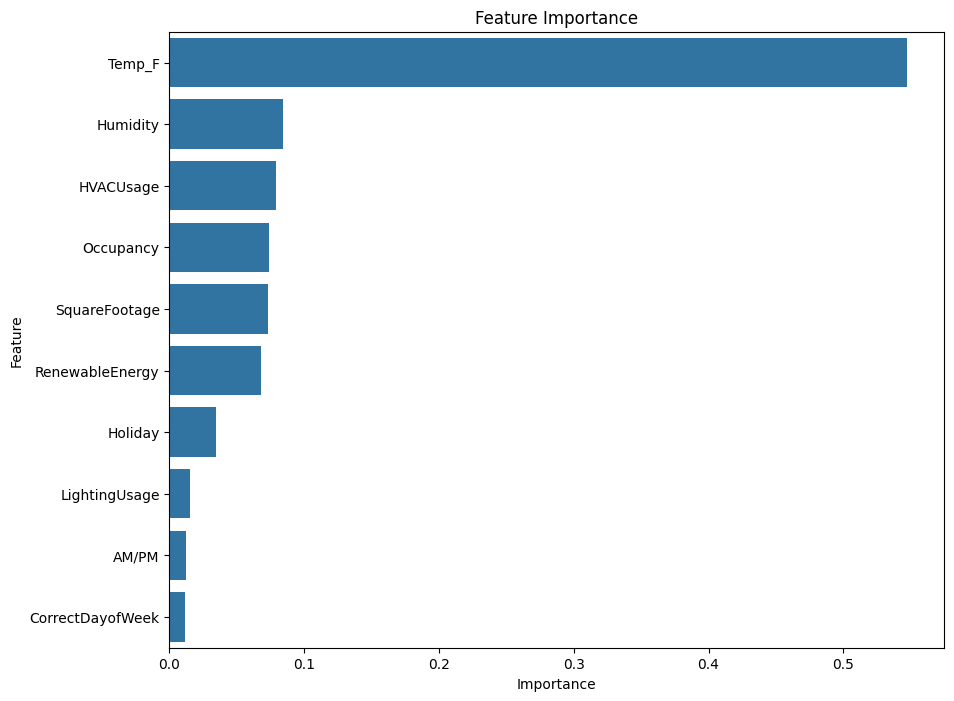

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Plot

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_imp_df['Importance'], y=feat_imp_col_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.savefig('/content/Feature_Importance.png', format='png')
plt.show()


Scatter plot to Visualize the prediction accuracy

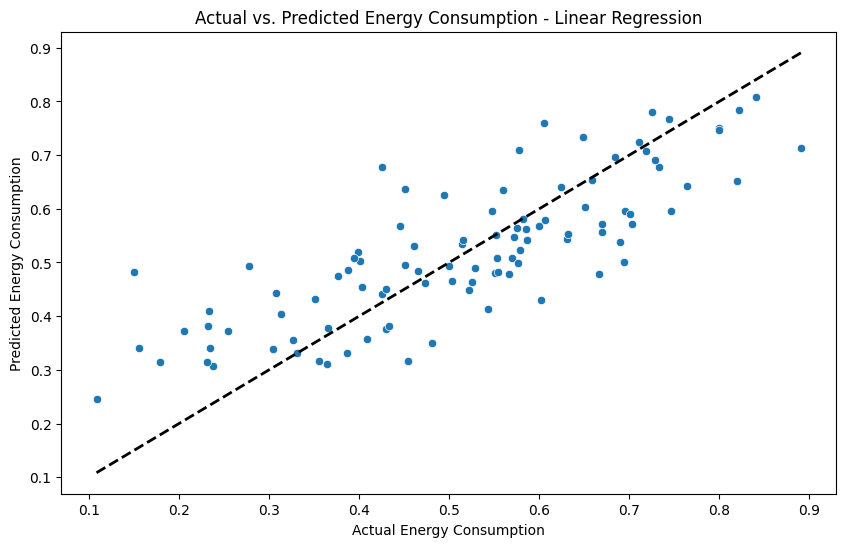

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming lr_y_test is your actual test target values and lr_y_pred are the predicted values from your model
# First, ensure that lr_y_test is a 1D array for compatibility with seaborn
if isinstance(lr_y_test, pd.DataFrame):
    lr_y_test = lr_y_test.squeeze()

# Ensure lr_y_pred is also a 1D array
if isinstance(lr_y_pred, np.ndarray) and lr_y_pred.ndim > 1:
    lr_y_pred = lr_y_pred.squeeze()

# Now, create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=lr_y_test, y=lr_y_pred)
plt.plot([lr_y_test.min(), lr_y_test.max()], [lr_y_test.min(), lr_y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Actual vs. Predicted Energy Consumption - Linear Regression')
plt.savefig('/content/Actual vs predicted EnergyConsumption.png', format='png')
plt.show()

Q-Q Plot to Visualize the prediction Accuracy

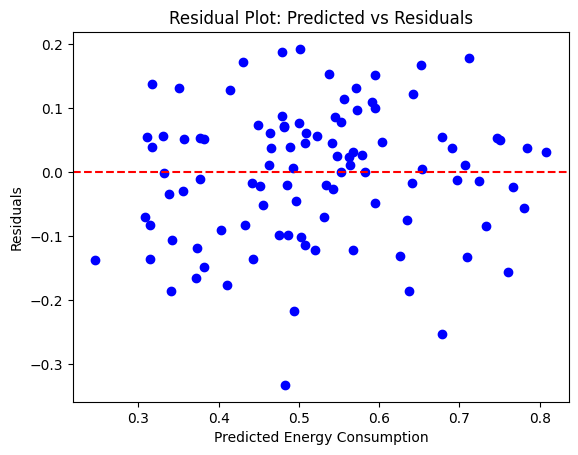

In [ ]:
# Residual plot
residuals = lr_y_test - lr_y_pred
plt.scatter(lr_y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.xlabel('Predicted Energy Consumption')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted vs Residuals')
plt.savefig('/content/Residual Plot.png', format='png')
plt.show()

Correlation Matrix

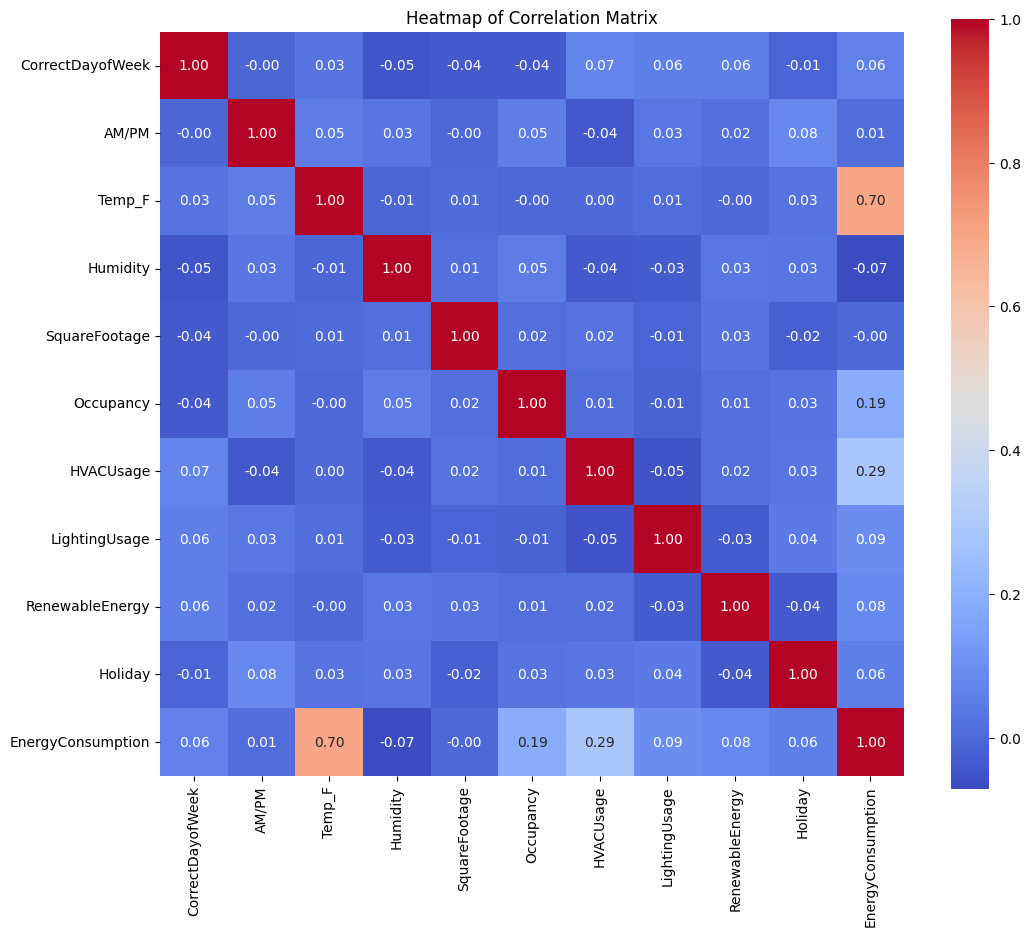

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns to avoid the TypeError
numeric_df = model_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
corr_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.savefig('/content/Correlation plot.png', format='png')
plt.show()